In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned combined data
train = pd.read_csv(r"C:\Users\on3_a\Documents\Data Analytics, Big Data & Predictive Analytics/Data/bikeshare_weather_joined.csv")
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722 entries, 0 to 8721
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8722 non-null   object 
 1   trips                8722 non-null   int64  
 2   Temp (°C)            8722 non-null   float64
 3   Dew Point Temp (°C)  8722 non-null   float64
 4   Rel Hum (%)          8722 non-null   float64
 5   Visibility (km)      8722 non-null   float64
 6   Stn Press (kPa)      8722 non-null   float64
 7   Hmdx                 8722 non-null   float64
 8   Wind Chill           8722 non-null   float64
 9   Strong Wind          8722 non-null   int64  
 10  Fog                  8722 non-null   int64  
 11  Freezing Rain        8722 non-null   int64  
 12  Haze                 8722 non-null   int64  
 13  Heavy Rain           8722 non-null   int64  
 14  Moderate Rain        8722 non-null   int64  
 15  Moderate Snow        8722 non-null   i

In [4]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday,hour,month
0,2018-01-01 00:00:00,4,-16.2,-20.5,70.0,16.1,102.13,0.0,-22.0,0,...,0,0,0,0,0,0,0,1,0,1
1,2018-01-01 01:00:00,10,-16.8,-21.1,70.0,16.1,102.10,0.0,-20.0,0,...,0,0,0,0,0,0,0,1,1,1
2,2018-01-01 02:00:00,6,-17.3,-20.8,75.0,16.1,102.15,0.0,-26.0,0,...,0,0,0,0,0,0,0,1,2,1
3,2018-01-01 03:00:00,14,-17.9,-21.6,73.0,16.1,102.13,0.0,-24.0,0,...,0,0,0,0,0,0,0,1,3,1
4,2018-01-01 04:00:00,6,-17.2,-21.1,72.0,16.1,102.09,0.0,-21.0,0,...,0,0,0,0,0,0,0,1,4,1


In [5]:
# Scale numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train.columns

Index(['date', 'trips', 'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday', 'hour', 'month'],
      dtype='object')

In [7]:
num_vars = ['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday', 'hour', 'month']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [8]:
train.head()

,date,trips,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Strong Wind,...,Heavy Rain,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Weekend,Holiday,hour,month
0,2018-01-01 00:00:00,4,0.107750,0.139847,0.638554,1.0,0.748614,0.0,0.31250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0
1,2018-01-01 01:00:00,10,0.096408,0.128352,0.638554,1.0,0.743068,0.0,0.37500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.043478,0.0
2,2018-01-01 02:00:00,6,0.086957,0.134100,0.698795,1.0,0.752311,0.0,0.18750,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.086957,0.0
3,2018-01-01 03:00:00,14,0.075614,0.118774,0.674699,1.0,0.748614,0.0,0.25000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.130435,0.0
4,2018-01-01 04:00:00,6,0.088847,0.128352,0.662651,1.0,0.741220,0.0,0.34375,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.173913,0.0


In [9]:
# Define independent and dependent variables
X,y =train[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday', 'hour', 'month']].values,train['trips'].values

In [10]:
# Split training data (70%) and test data (30%)
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 6105 rows
Test Set: 2617 rows


## Linear Regression Model (Trial 2)

In [12]:
# Import model, time module, and apply cross validation
import time
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [13]:
regressor = LinearRegression()

In [14]:
start = time.time()
predicted = cross_val_predict(regressor, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.1409924030303955


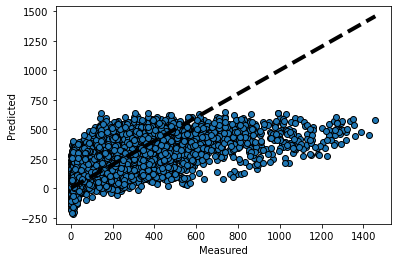

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
import math

In [18]:
# Evaluate model
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(regressor, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.42600755630124004
RMSE:  188.760
neg_mean_absolute_error : 130.61 (+/- 14.35)


## Random Forest Regression Model (Trial 2)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfr1 = RandomForestRegressor(n_estimators=60, criterion='mse', random_state=2)

In [25]:
start = time.time()
predicted = cross_val_predict(rfr1, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 12.076306581497192


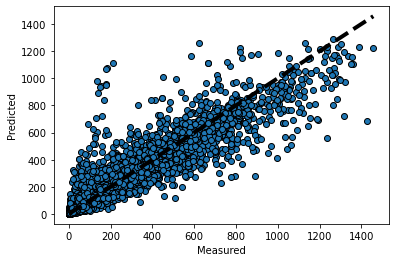

In [26]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [28]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr1, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2)) 

r2 :  0.8540932750118532
RMSE:  94.912
neg_mean_absolute_error : 50.96 (+/- 6.87)


## Gradient Boosting Regression Model (Trial 2)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)

In [31]:
start = time.time()
predicted = cross_val_predict(gbr, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 23.67935609817505


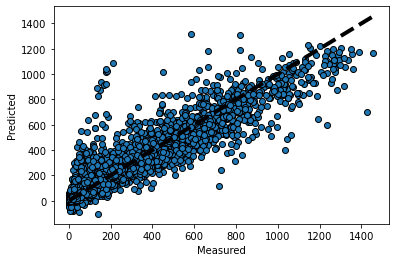

In [32]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(gbr, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.872506313870666
RMSE:  88.946
neg_mean_absolute_error : 48.72 (+/- 7.98)


## Detecting Multicollinearity with VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
X = train[['Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday', 'hour', 'month']]

In [36]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature          VIF
0             Temp (°C)  1474.406542
1   Dew Point Temp (°C)  1672.083571
2           Rel Hum (%)   214.636930
3       Visibility (km)    72.647889
4       Stn Press (kPa)    16.058623
5                  Hmdx     3.116371
6            Wind Chill    96.197202
7           Strong Wind     1.143163
8                   Fog     3.920244
9         Freezing Rain     1.133101
10                 Haze     1.068451
11           Heavy Rain     1.091222
12        Moderate Rain     1.047309
13        Moderate Snow     1.010457
14                 Rain     1.408700
15                 Snow     1.580228
16        Thunderstorms     1.092347
17              Weekend     1.193680
18              Holiday     1.057564
19                 hour     3.905812
20                month     4.397690


In [37]:
# Remove Dew Point Temp (°C)
X_reduced = train[['Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Wind Chill',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain',
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms',
       'Weekend', 'Holiday', 'hour', 'month']]

In [38]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                          for i in range(len(X_reduced.columns))]
  
print(vif_data)

            feature        VIF
0         Temp (°C)  39.471095
1       Rel Hum (%)  17.674953
2   Visibility (km)  45.514198
3   Stn Press (kPa)  14.026498
4              Hmdx   3.090127
5        Wind Chill  80.212933
6       Strong Wind   1.142318
7               Fog   2.923261
8     Freezing Rain   1.132856
9              Haze   1.047073
10       Heavy Rain   1.091221
11    Moderate Rain   1.047277
12    Moderate Snow   1.005761
13             Rain   1.394582
14             Snow   1.282597
15    Thunderstorms   1.092175
16          Weekend   1.193639
17          Holiday   1.057232
18             hour   3.829633
19            month   4.261019


In [39]:
# Remove Wind Chill
X_reduced = train[['Temp (°C)', 'Rel Hum (%)',
       'Visibility (km)', 'Stn Press (kPa)', 'Hmdx', 'Strong Wind',
       'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain', 'Moderate Rain',
       'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 'Weekend',
       'Holiday', 'hour', 'month']]

In [40]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                          for i in range(len(X_reduced.columns))]
  
print(vif_data)

            feature        VIF
0         Temp (°C)  20.911846
1       Rel Hum (%)  15.914309
2   Visibility (km)  36.806401
3   Stn Press (kPa)  13.976224
4              Hmdx   2.426714
5       Strong Wind   1.142312
6               Fog   2.667985
7     Freezing Rain   1.132164
8              Haze   1.042037
9        Heavy Rain   1.091221
10    Moderate Rain   1.046864
11    Moderate Snow   1.005240
12             Rain   1.384615
13             Snow   1.277838
14    Thunderstorms   1.092008
15          Weekend   1.191609
16          Holiday   1.056813
17             hour   3.774519
18            month   4.123553


In [41]:
# Remove Visibility (km)
X_reduced = train[['Temp (°C)', 'Rel Hum (%)', 'Stn Press (kPa)', 'Hmdx',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain', 
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 
       'Weekend', 'Holiday', 'hour', 'month']]

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                          for i in range(len(X_reduced.columns))]
  
print(vif_data)

            feature        VIF
0         Temp (°C)  15.983086
1       Rel Hum (%)  12.933716
2   Stn Press (kPa)   8.389568
3              Hmdx   2.183190
4       Strong Wind   1.142243
5               Fog   1.436483
6     Freezing Rain   1.131821
7              Haze   1.007356
8        Heavy Rain   1.091092
9     Moderate Rain   1.046841
10    Moderate Snow   1.001003
11             Rain   1.384032
12             Snow   1.162542
13    Thunderstorms   1.091971
14          Weekend   1.191311
15          Holiday   1.056265
16             hour   3.616786
17            month   4.119019


In [43]:
# Remove Rel Hum (%)
X_reduced = train[['Temp (°C)', 'Stn Press (kPa)', 'Hmdx',
       'Strong Wind', 'Fog', 'Freezing Rain', 'Haze', 'Heavy Rain', 
       'Moderate Rain', 'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 
       'Weekend', 'Holiday', 'hour', 'month']]

In [44]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                          for i in range(len(X_reduced.columns))]
  
print(vif_data)

            feature        VIF
0         Temp (°C)  12.167652
1   Stn Press (kPa)   7.217789
2              Hmdx   2.137252
3       Strong Wind   1.142171
4               Fog   1.295921
5     Freezing Rain   1.130228
6              Haze   1.007115
7        Heavy Rain   1.091051
8     Moderate Rain   1.046694
9     Moderate Snow   1.000432
10             Rain   1.301893
11             Snow   1.074759
12    Thunderstorms   1.091926
13          Weekend   1.190913
14          Holiday   1.055768
15             hour   3.616753
16            month   3.979409


In [45]:
# Remove Stn Press (kPa)
X_reduced = train[['Temp (°C)', 'Hmdx', 'Strong Wind', 'Fog', 
       'Freezing Rain', 'Haze', 'Heavy Rain', 'Moderate Rain', 
       'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 
       'Weekend', 'Holiday', 'hour', 'month']]

In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reduced.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i)
                          for i in range(len(X_reduced.columns))]
  
print(vif_data)

          feature       VIF
0       Temp (°C)  7.908728
1            Hmdx  1.843447
2     Strong Wind  1.141302
3             Fog  1.295917
4   Freezing Rain  1.130228
5            Haze  1.006547
6      Heavy Rain  1.091016
7   Moderate Rain  1.045455
8   Moderate Snow  1.000137
9            Rain  1.284848
10           Snow  1.046526
11  Thunderstorms  1.091834
12        Weekend  1.168871
13        Holiday  1.038592
14           hour  3.365764
15          month  3.922870


## Linear Regression Model (Trial 3)

In [47]:
# Create new training set and testing set after dropping features
X,y =train[['Temp (°C)', 'Hmdx', 'Strong Wind', 'Fog', 
       'Freezing Rain', 'Haze', 'Heavy Rain', 'Moderate Rain', 
       'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 
       'Weekend', 'Holiday', 'hour', 'month']].values,train['trips'].values

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 6105 rows
Test Set: 2617 rows


In [49]:
regressor1 = LinearRegression()

In [50]:
start = time.time()
predicted = cross_val_predict(regressor1, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.025661945343017578


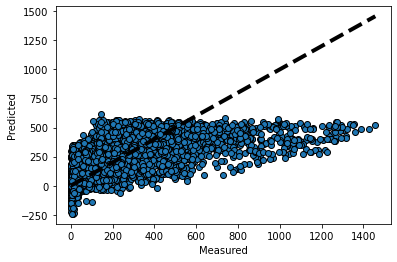

In [51]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [52]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(regressor1, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.4020562207529533
RMSE:  192.637
neg_mean_absolute_error : 134.60 (+/- 13.34)


## Random Forest Regression Model (Trial 3)

In [53]:
rfr2 = RandomForestRegressor(n_estimators=60, criterion='mse', random_state=2)

In [54]:
start = time.time()
predicted = cross_val_predict(rfr2, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 6.439098119735718


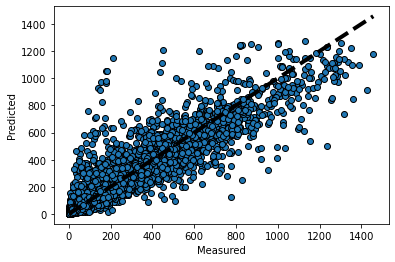

In [55]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [57]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr2, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2)) 

r2 :  0.8407946811590473
RMSE:  98.990
neg_mean_absolute_error : 53.89 (+/- 8.27)


## Gradient Boosting Regression Model (Trial 3)

In [58]:
gbr2 = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)

In [59]:
start = time.time()
predicted = cross_val_predict(gbr2, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 11.583830118179321


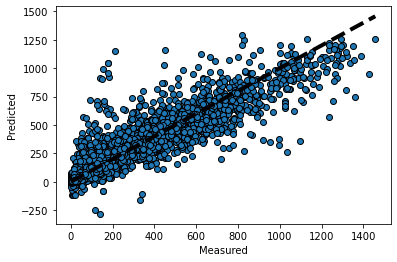

In [60]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [61]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(gbr2, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2))   

r2 :  0.8499115990826939
RMSE:  96.140
neg_mean_absolute_error : 52.43 (+/- 7.61)


## Hyperparameter Tuning Random Forest Regression (Trial 4)

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Set parameter ranges to test
param_grid = {'bootstrap': [True],
              'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}

In [72]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [73]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [74]:
rfr3 = RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=3,
                             max_features=3, max_depth=80, bootstrap=True, random_state=2)

In [75]:
start = time.time()
predicted = cross_val_predict(rfr3, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2.6785786151885986


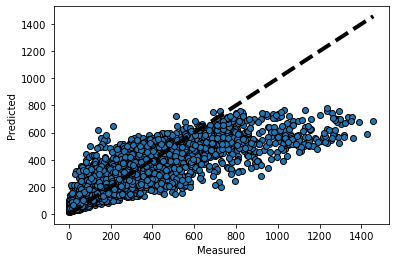

In [76]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [77]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(rfr3, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.2f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2)) 

r2 :  0.7328877864316479
RMSE:  129.27
neg_mean_absolute_error : 80.37 (+/- 10.84)


## Hyperparameter Tuning Gradient Boosting Regression (Trial 4)

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
parameters = {
    'learning_rate': [0.1, 0.15, 0.2, 0.25],
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'n_estimators': [10, 20, 50, 100, 150, 200]
}

In [64]:
regressor = GridSearchCV(GradientBoostingRegressor(), parameters, verbose=1,cv=5,n_jobs=-1) 
regressor.fit(X_train,y_train) 

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.25],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             verbose=1)

In [65]:
regressor.best_params_

{'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}

In [66]:
gbr3 = GradientBoostingRegressor(learning_rate = 0.15,
                                n_estimators = 100,
                                max_depth = 6,
                                min_samples_leaf = 1,
                                random_state = 2)

In [67]:
start = time.time()
predicted = cross_val_predict(gbr3, X_train, y_train, cv=15)
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 5.96694278717041


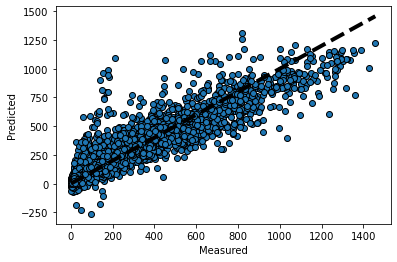

In [68]:
fig,ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors = (0,0,0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [69]:
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error']
for i in scoring:
    scores = cross_val_score(gbr3, X_train, y_train, cv=15, scoring = i)
#    print(scores)
    if i == 'r2':
        print(i, ': ', scores.mean())
    elif i == 'neg_mean_squared_error':    
        x = -1*scores.mean()
        y = math.sqrt(x) 
        print('RMSE: ', "%0.3f" % y)
    elif i == 'neg_mean_absolute_error':
        x = -1*scores.mean()
        print(i, ": %0.2f (+/- %0.2f)" % (x, scores.std() * 2)) 

r2 :  0.8631242596720078
RMSE:  91.911
neg_mean_absolute_error : 51.62 (+/- 7.35)


## Best Model - Gradient Boosting Regression (Trial 4)

In [78]:
# For Gradient Boosting Regression, identify the importance of each feature
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [112]:
gbr3.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=6, random_state=2)

In [80]:
print(gbr3.feature_importances_)

[3.59397414e-01 6.70368857e-03 1.69687368e-04 7.29720231e-03
 3.12531974e-05 1.65566474e-04 5.56992263e-04 1.49094086e-04
 2.79039131e-05 1.49495243e-02 3.91256426e-04 1.09477440e-04
 4.46483590e-02 8.63219918e-03 5.34406726e-01 2.23636555e-02]


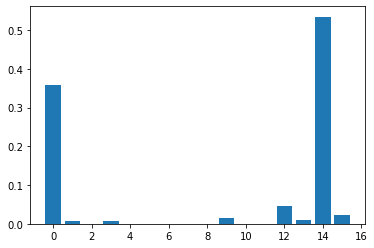

In [92]:
pyplot.bar(range(len(gbr3.feature_importances_)), gbr3.feature_importances_)
pyplot.show()

<AxesSubplot:>

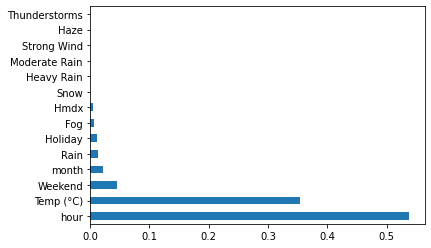

In [111]:
%matplotlib inline   
X = train[['Temp (°C)', 'Hmdx', 'Strong Wind', 'Fog', 
       'Freezing Rain', 'Haze', 'Heavy Rain', 'Moderate Rain', 
       'Moderate Snow', 'Rain', 'Snow', 'Thunderstorms', 
       'Weekend', 'Holiday', 'hour', 'month']]
y = train['trips']
gbr3.fit(X,y)
(pd.Series(gbr3.feature_importances_, index=X.columns)
   .nlargest(14)
   .plot(kind='barh')) 

In [113]:
predicted = gbr3.predict(X_test)

In [114]:
labels = train.trips

In [115]:
labels.describe()

count    8722.000000
mean      220.471795
std       251.310554
min         1.000000
25%        34.000000
50%       128.000000
75%       329.000000
max      1602.000000
Name: trips, dtype: float64

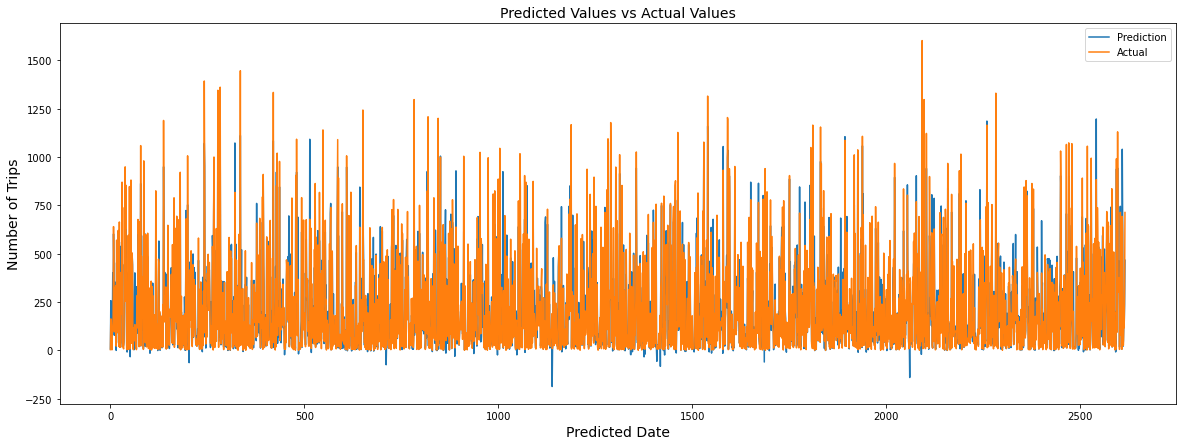

In [116]:
plt.figure(figsize=(20,7))
plt.plot(predicted)
plt.plot(y_test)
plt.legend(['Prediction', 'Actual'])
plt.ylabel("Number of Trips", fontsize = 14)
plt.xlabel("Predicted Date", fontsize = 14)
plt.title("Predicted Values vs Actual Values", fontsize = 14)
plt.show()

In [117]:
print("Training Accuracy = ", gbr3.score(X_train, y_train))
print("Test Accuracy = ", gbr3.score(X_test, y_test))

Training Accuracy =  0.930382772304824
Test Accuracy =  0.8713253293734445
